In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input

from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Determine if GPU is available
tf.test.gpu_device_name()

''

In [3]:
batch_size = 128
n_classes = 10
n_epoches = 15

im_row, im_col = 28, 28

In [4]:
# Load train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}\n')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)

y_train shape: (60000,)
y_test shape: (10000,)


In [6]:
# Sample data
# x_train[2]
y_train[2]


4

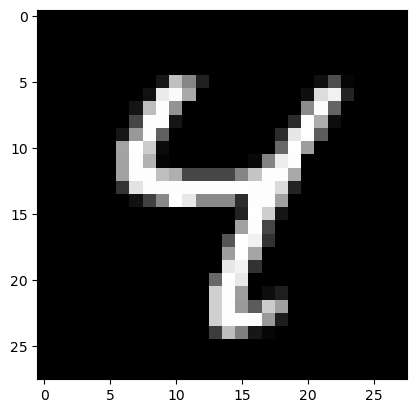

In [7]:
plt.imshow(x_test[6], cmap='gray')

index: 15, i: 0
index: 29, i: 1
index: 38, i: 2
index: 42, i: 3
index: 52, i: 4
index: 71, i: 5
index: 79, i: 6
index: 84, i: 7
index: 91, i: 8
index: 96, i: 9


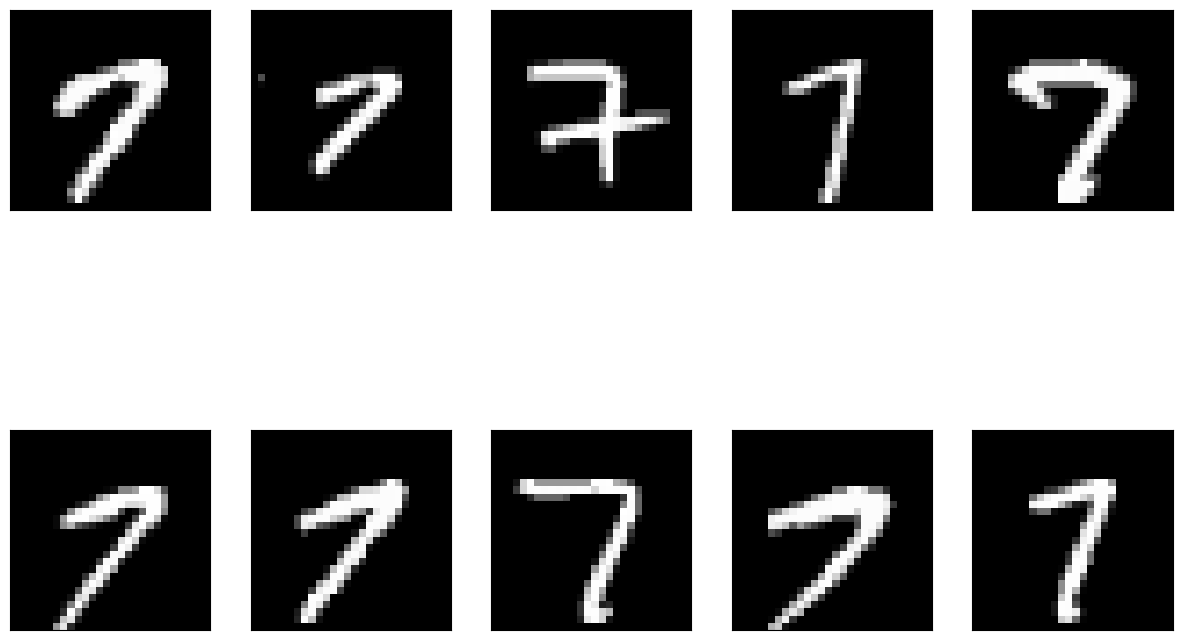

In [8]:
fig =  plt.figure(figsize=(15,10))

i = 0
for f in range(0, y_train.shape[0]):
#     print(f'index: {f}, label: {y_train[f]}')
    if(y_train[f] == 7 and i < 10):
        print(f'index: {f}, i: {i}')
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[f], cmap='gray')
        plt.xticks([])
        plt.yticks([])
        i += 1

In [9]:
# show image format location
K.image_data_format()

'channels_last'

In [10]:
# reshape the training and testing data sets 
if K.image_data_format == 'channel_last':
    x_train = x_train.reshape(x_train.shape[0], 1, im_row, im_col)
    x_test = x_test.reshape(x_test.shape[0], 1, im_row, im_col)
    
else:
    x_train = x_train.reshape(x_train.shape[0], im_row, im_col, 1)
    x_test = x_test.reshape(x_test.shape[0], im_row, im_col, 1)
        



In [11]:
x_train[0][0][0]

array([0], dtype=uint8)

In [12]:
# Normalization:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

input_shape = x_train.shape[0]

In [13]:
x_train[0][0][0]

array([0.], dtype=float32)

In [14]:
# Data stats:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'input shape: {x_train[0].shape}\n')

print(f'Training sample count: {input_shape}')
print(f'Test sample count: {x_test.shape[0]}\n')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
input shape: (28, 28, 1)

Training sample count: 60000
Test sample count: 10000



In [15]:
type(x_train[0])

numpy.ndarray

In [16]:
# Create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu' 
                 ,input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=n_classes, activation='softmax'))


In [17]:
# Compile Model:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [30]:
# To save the model for furthure use
checkpoint = keras.callbacks.ModelCheckpoint(filepath='keras_MNIST_CNN.h5',
                                            verbose=1,
                                            save_best_only=True)

In [31]:
%%time
# fit the model
model.fit(x=x_train, y=y_train, batch_size=batch_size,
         epochs=n_epoches,
         verbose=1,
         validation_data=(x_test, y_test)
         ,callbacks=[checkpoint])

Epoch 1/15
468/469 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9748
Epoch 1: val_loss improved from inf to 0.04136, saving model to keras_MNIST_CNN.h5
469/469 [==============================] - 22s 46ms/step - loss: 0.0853 - accuracy: 0.9748 - val_loss: 0.0414 - val_accuracy: 0.9857
Epoch 2/15
  1/469 [..............................] - ETA: 19s - loss: 0.0792 - accuracy: 0.9766

C:\Users\104974068\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/469 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9805
Epoch 2: val_loss improved from 0.04136 to 0.03365, saving model to keras_MNIST_CNN.h5
469/469 [==============================] - 20s 42ms/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0337 - val_accuracy: 0.9884
Epoch 3/15
468/469 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9840
Epoch 3: val_loss did not improve from 0.03365
469/469 [==============================] - 20s 42ms/step - loss: 0.0519 - accuracy: 0.9840 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 4/15
469/469 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9866
Epoch 4: val_loss improved from 0.03365 to 0.03310, saving model to keras_MNIST_CNN.h5
469/469 [==============================] - 21s 45ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 5/15
469/469 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9880
Epoch 5

In [32]:
model.save('keras_MNIST_CNN.keras')

In [33]:
score = model.evaluate(x=x_test, y=y_test, verbose=2)

313/313 - 2s - loss: 0.0331 - accuracy: 0.9920 - 2s/epoch - 8ms/step


In [34]:
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 0.033084437251091
Test Accuracy: 0.9919999837875366


In [35]:
# Model AUC
from sklearn.metrics import roc_auc_score

In [36]:
%%time
preds = model.predict(x_test)

313/313 [==============================] - 2s 8ms/step
CPU times: total: 32.4 s
Wall time: 3.32 s


In [37]:
# check a sample prediction
print(f'predictions for x_test[0]: {preds[6]}, \n\n Actual label {y_test[6]}\n\n')
print(f'predictions for x_test[0] after rounding: {np.round(preds[6])}')

predictions for x_test[0]: [5.6631566e-14 1.2484882e-09 7.8666557e-10 6.0319358e-12 9.9981004e-01
 3.0153458e-08 2.0257511e-12 4.0765034e-08 8.9311303e-05 1.0052990e-04], 

 Actual label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


predictions for x_test[0] after rounding: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [38]:
y_test[6]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
auc = roc_auc_score(np.round(preds), y_test)
print(f'AUC: {auc:.2%}')

AUC: 99.57%


## Preview Convolution layers step on image

In [40]:
from keras import models
layers = [layer.output for layer in model.layers[:4]]
model_layers = models.Model(inputs=model.input, outputs=layers)
activations = model_layers.predict(x_train)

1875/1875 [==============================] - 10s 5ms/step


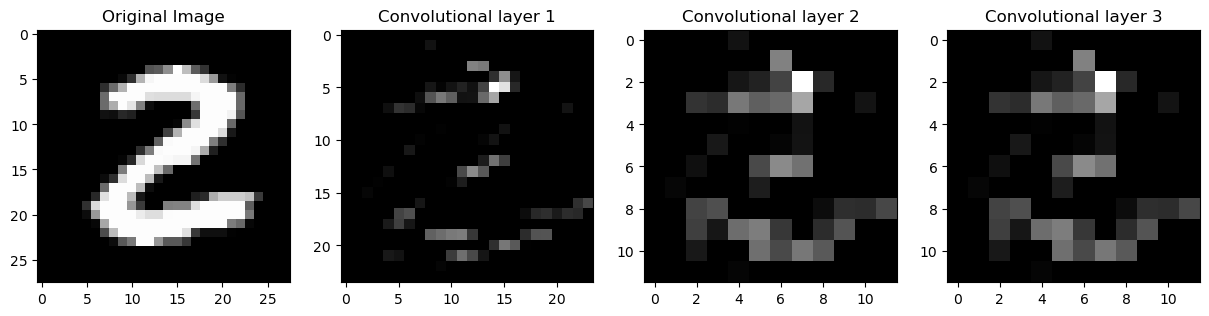

In [41]:
conv_layers = 4
desired_num_idx = 25
fig = plt.figure(figsize=(15,10))

plt.subplot(1, conv_layers, 1)
plt.title("Original Image")
plt.imshow(x_train[desired_num_idx].reshape(28, 28), cmap='gray')
plt.x_ticks=([])
plt.y_ticks=([])

for f in range(1, conv_layers):
    plt.subplot(1, conv_layers, f + 1)
    plt.title("Convolutional layer %d" %f)
    layer_activation = activations[f]
    plt.imshow(layer_activation[desired_num_idx, :, :, 0], cmap='gray')
    plt.x_ticks=([])
    plt.y_ticks=([])
    
plt.show()